In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np

# --- 1) Crea rete ({Fuel, Battery} -> {Gauge};
bn = gum.BayesNet("SixBoxesBN")

N = 6 # number of hypotheses

def bool_var(name, desc):
    v = gum.LabelizedVariable(name, desc, 2)
    v.changeLabel(0, "W")   # White
    v.changeLabel(1, "B")   # Black
    return v

def box_var(name, desc):
    v = gum.LabelizedVariable(name, desc, N)
    for i in range(N):
        v.changeLabel(i, f"H{i}")
    return v

In [2]:
M = 4 # number of measurements

bn.add(box_var("B", "BoxHypothesis"))

for i in range(M):
    bn.add(bool_var(f"X{i}", f"Measurement {i}"))
    bn.addArc("B", f"X{i}")


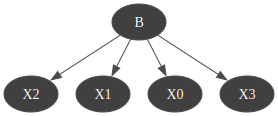

In [3]:
# --- 2) Prior e modello
# P(H_i) = 1/6
p = 1./N
bn.cpt("B").fillWith(np.repeat(p, N))

# # P(X_i | H_j)
for i in range(M):
    for j in range(N):
        pj = float(j / (N-1));
        bn.cpt(f"X{i}")[{"B":j}] = [1. - pj, pj]
        
# --- 3) Visualizza rete (struttura)
gnb.showBN(bn)

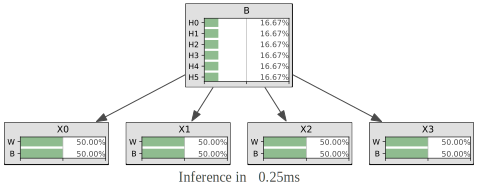

In [4]:
# --- 4) "Prior" (nessuna evidenza): nei nodi vedi le marginali a priori
gnb.showInference(bn, evs={})

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output

vars_ = []
for i in range(M):
    vars_.append(f"X{i}")

selectors = {}
for v in vars_:
    selectors[v] = widgets.Dropdown(
        options=[("— (nessuna evidenza)", None), ("W", 0), ("B", 1)],
        value=None,
        description=v + ":",
        layout=widgets.Layout(width="130px")
    )

out = widgets.Output()

def render(_=None):
    evs = {v: selectors[v].value for v in vars_ if selectors[v].value is not None}
    with out:
        clear_output(wait=True)
        gnb.showInference(bn, evs=evs)

for v in vars_:
    selectors[v].observe(render, names="value")

ui = widgets.VBox([widgets.HBox([selectors[v] for v in vars_]), out])
display(ui)
render()
